<a href="https://colab.research.google.com/github/nupursjsu/Deep-Learning/blob/master/Ungraded_Assignment3/Planar_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planar data classification

## Importing necessary libraries

In [0]:
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Setting seed to have consistent results
np.random.seed(12)

## Getting testCases_v2 and planar_utils packages to import from

In [0]:
# Code to read files into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [39]:
#Getting testCases_v2 package file
link = 'https://drive.google.com/open?id=1NDC3x833Sf2HIDzHknolZ3Z2mhPHsRhS'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('testCases_v2.py')

1NDC3x833Sf2HIDzHknolZ3Z2mhPHsRhS


In [40]:
#Getting planar_utils package file
link = 'https://drive.google.com/open?id=1jFJlq0lenxPyMZuytNysnco4mFfg0rAd'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('planar_utils.py')

1jFJlq0lenxPyMZuytNysnco4mFfg0rAd


In [0]:
# Importing functions from above packages
from testCases_v2 import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

## Loading Planar Dataset 
It contains images of two types of flowers.

In [0]:
X, Y = load_planar_dataset()

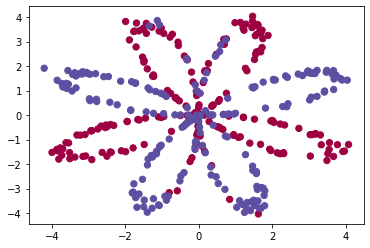

In [43]:
#Visualizing the data loaded using matplotlib
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

It seems an image of a flower with two some red (y=0) and blue (y=1) points.

In [44]:
#Checking shape of the arrays
X_shape = X.shape
Y_shape = Y.shape
s = Y.shape[1]  # training set size

print ('The shape of X is: ' + str(X_shape))
print ('The shape of Y is: ' + str(Y_shape))
print ('I have s = %d training examples!' % (s))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have s = 400 training examples!


## Training a simple Logistic Regression classifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of LR classifier: 47 % 


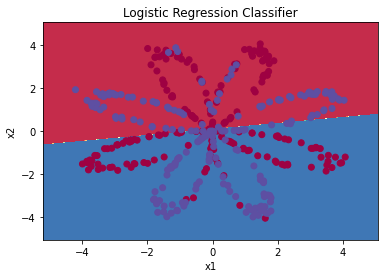

In [45]:
#Training and fitting LR classifier
classifier = sklearn.linear_model.LogisticRegressionCV();
classifier.fit(X.T, Y.T);

#Plotting the decision boundary
plot_decision_boundary(lambda x: classifier.predict(x), X, Y)
plt.title("Logistic Regression Classifier")

#Making predictions and evaluating accuracy
pred = classifier.predict(X.T)
print ('Accuracy of LR classifier: %d ' % float((np.dot(Y, pred) + np.dot(1 - Y,1 - pred)) / float(Y.size) * 100) +
       '% ')

You can see the LR classifier achieved only an accuracy of 47%.

## Building our own NN model

In [0]:
#Defining size of input, output and hidden layers
def size_of_layers(X, Y):
    x = X.shape[0]
    h = 4
    y = Y.shape[0]
    return (x, h, y)

In [0]:
#Initalizing model parameters
def initialize_params(x, h, y):
    np.random.seed(1)
    W1 = np.random.randn(h, x) * 0.01
    b1 = np.zeros(shape=(h, 1))
    W2 = np.random.randn(y, h) * 0.01
    b2 = np.zeros(shape=(y, 1))
    
    assert (W1.shape == (h, x))
    assert (b1.shape == (h, 1))
    assert (W2.shape == (y, h))
    assert (b2.shape == (y, 1))
    
    params = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return params

In [0]:
#Implementing forward propogation
def fwd_prop(X, params):
    
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
   
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    #Values required in back prop are stored in op
    op = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, op

In [0]:
#Computing loss
def compute_loss(A2, Y, params):
    
    r = Y.shape[1] 
    W1 = params['W1']
    W2 = params['W2']
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    loss = - np.sum(logprobs) / r
   
    loss = np.squeeze(loss)
    assert(isinstance(loss, float))
    
    return loss

In [0]:
#Implementing backward propogation
def bwd_prop(params, op, X, Y):
  
    r = X.shape[1]
  
    W1 = params['W1']
    W2 = params['W2']
    
    A1 = op['A1']
    A2 = op['A2']
  
    dZ2= A2 - Y
    dW2 = (1 / r) * np.dot(dZ2, A1.T)
    db2 = (1 / r) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / r) * np.dot(dZ1, X.T)
    db1 = (1 / r) * np.sum(dZ1, axis=1, keepdims=True)
   
    
    gradients = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return gradients

In [0]:
#Updating parameters after computing gradients
def update_params(params, gradients, learning_rate = 1.2):
   
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
  
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
 
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
   
    params = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return params

In [0]:
#Building our final NN model using above functions
def my_NNmodel(X, Y, h, no_of_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    x = size_of_layers(X, Y)[0]
    y = size_of_layers(X, Y)[2]

    params = initialize_params(x, h, y)
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    for i in range(0, no_of_iterations):
    
        A2, op = fwd_prop(X, params)
        
        loss = compute_loss(A2, Y, params)
        gradients = bwd_prop(params, op, X, Y)
 
        params = update_params(params, gradients)
        
        if print_cost and i % 1000 == 0:
            print ("Loss after iteration %i: %f" %(i, loss))

    return params

In [0]:
#Making predictions
def pred(params, X):
    
    A2, op = fwd_prop(X, params)
    pred = np.round(A2)
    
    return pred

In [83]:
params = my_NNmodel(X, Y, h = 4, no_of_iterations = 10000, print_cost=True)

Loss after iteration 0: 0.693117
Loss after iteration 1000: 0.281237
Loss after iteration 2000: 0.268934
Loss after iteration 3000: 0.261963
Loss after iteration 4000: 0.257408
Loss after iteration 5000: 0.254261
Loss after iteration 6000: 0.251984
Loss after iteration 7000: 0.250272
Loss after iteration 8000: 0.248945
Loss after iteration 9000: 0.247890


## Evaluating model

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

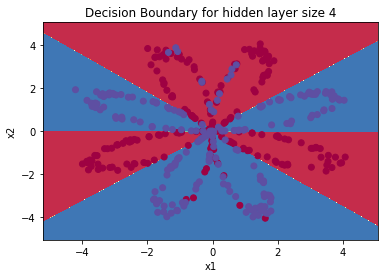

In [84]:
#Plotting the decision boundary
plot_decision_boundary(lambda x: pred(params, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [85]:
#Evaluating accuracy of NN model Built
pred = pred(params, X)
print ('Accuracy: %d' % float((np.dot(Y, pred.T) + np.dot(1 - Y, 1 - pred.T)) / float(Y.size) * 100) + '%')

Accuracy: 91%


##Conclusion

We got an accuracy of 91% using NN model.